In [1]:
import pandas as pd
import numpy as np

In [3]:
raw_df = pd.read_excel('m4-yolcu.xlsx')

In [24]:
raw_df

,fusedyear,fusedmonth,fusedday,fusedhour,toplam_yolcu
0,2020,1,1,0,3660
1,2020,1,1,1,3727
2,2020,1,1,2,2499
3,2020,1,1,3,1598
4,2020,1,1,4,1114
...,...,...,...,...,...
20953,2022,7,30,19,12332
20954,2022,7,30,20,9754
20955,2022,7,30,21,8403
20956,2022,7,30,22,7497


In [7]:
q1, q3 = np.percentile(sorted(raw_df['toplam_yolcu']), [25, 75])

In [8]:
q1

679.0

In [9]:
q3

9506.75

In [10]:
iqr = q3 - q1

In [11]:
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

In [13]:
outliers = [x for x in raw_df['toplam_yolcu'] if x <= lower_bound or x >= upper_bound]

In [25]:
len(outliers)

523

In [22]:
 df_out = raw_df.loc[(raw_df['toplam_yolcu'] > lower_bound) & (raw_df['toplam_yolcu'] < upper_bound)]

In [26]:
df_out.to_csv("/root/staj/wooutlier.csv",index=False)

In [18]:
raw_df.drop(outliers[0])

KeyError: '[25673] not found in axis'

In [21]:
raw_df['toplam_yolcu'][outliers]

KeyError: "None of [Int64Index([25673, 28461, 25682, 25523, 32102, 23368, 27983, 22836, 28097,\n            26490,\n            ...\n            23425, 23963, 23915, 23580, 24196, 24299, 24796, 26372, 24373,\n            24673],\n           dtype='int64', length=523)] are in the [index]"

In [7]:
del raw_df['Unnamed: 0.1']

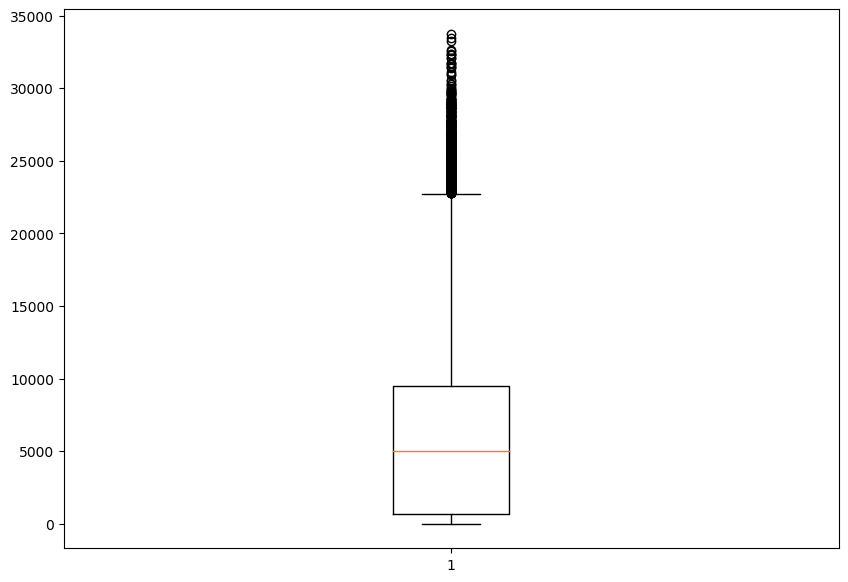

In [15]:
import matplotlib.pyplot as plt
 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(raw_df['toplam_yolcu'])
 
# show plot
plt.show()